# Table of Contents <span style="color:blue">

1. [Import Libraries](#import-libraries)

2. [Read Data](#read-data)

3. [Data Cleaning](#data-cleaning)

    3.1 [Check Missing Data](#check-missing-data)
    
    3.2 [Zero Imputation](#zero-imputation)
    
    3.3 [Data Type Conversion](#data-type-conversion)
    
    3.4 [Type Casting to Datetime](#type-casting-to-datetime)
    
    3.5 [Extract Data into a new column](#extract-data)
    
    3.6 [Deduplication](#deduplication)
    
    3.7 [Sort Data](#sort-data)
    
    3.8 [Group Data](#group-data)
    
4. [Find Correlation](#find-correlation)

    4.1 [Quick Scatter Plot with Matplotlib](#quick-scatter-plot-with-matplotlib)
    
    4.2 [Regression Plot using Seaborn](#regression-plot-using-seaborn)
    
    4.3 [Find Correlation in Numeric Values using `.corr()` Method](#find-correlation-in-numeric-values)
    
    4.4 [Create Heatmap using Seaborn](#create-heatmap-using-seaborn)
    
    4.4.1 [Categorical Encoding](#categorical-encoding)
    
    4.5 [Extracting Only Pairs with High Correlation](#extracting-only-pairs-with-high-correlation)
    
    4.6 [Create boxplot](#create-boxplot)
    
    4.7 [Create Swarmplot using Seaborn](#create-swarmplot)
    
    4.8 [Create stripplot using Seaborn](#create-stripplot)


# 1. Import libraries <a name="import-libraries"></a>

In [1]:
# data manipulation and analysis library
import pandas as pd

# data visualization library based on Matplotlib, and it provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns 

# 2D plotting library 
import matplotlib
import matplotlib.pyplot as plt 

# Sets the plotting style to 'ggplot' for producing clear and concise visualizations.
plt.style.use('ggplot') 

# to create a new figure for plotting.
from matplotlib.pyplot import figure

# allows the Matplotlib plots to be displayed directly below the code cell.
%matplotlib inline

# Sets the default figure size for Matplotlib plots to 12 inches by 8 inches.
matplotlib.rcParams['figure.figsize'] = (12,8)

# library for numerical operations used for working with arrays and matrices.
import numpy as np

# 2. Read the data <a name="read-data"></a>

In [2]:
df = pd.read_csv(r'C:\personal_projects\movie\movies.csv')

In [3]:
# option to see all rows and columns 

pd.set_option('display.max_rows', None)

In [4]:
# Visualise the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# 3. Data cleaning <a name="data-cleaning"></a>

**3.1 Check missing data** <a name="check-missing-data"></a>

In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
# Data types of the columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

**3.2 Zero Imputation** <a name="zero-imputation"></a>

In [7]:
# Fill empty cells with zero

df['budget'].fillna(0, inplace=True)
df['gross'].fillna(0, inplace=True)
df['votes'].fillna(0, inplace=True)
df['runtime'].fillna(0, inplace=True)

**3.3 Data type conversion** <a name="data-type-conversion"></a>

In [8]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')


df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [9]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


**3.4 Type casting to datetime** <a name="type-casting-to-datetime"></a>

In [10]:
# Convert released column into datetime format
# Replace Not a Time (NaT) values into 0
df['released'].fillna(0, inplace=True)

# Extract the date from the object using Regex
df['released'] =  pd.to_datetime(df['released'].str.extract(r'(\b\w+ \d+, \d{4})')[0])

In [11]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [12]:
df['released'].dtypes

dtype('<M8[ns]')

**3.5 Extract Data into a new column** <a name="extract-data"></a>

In [13]:
df['YearCorrected'] = df['released'].astype(str).str[:4]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrected
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


**3.6 Deduplication** <a name="deduplication"></a>

In [14]:
# To drop duplicates in a column
df.drop_duplicates()

**3.7 Sort data** <a name="sort-data"></a>

In [15]:
# Sort the values in descending order to see the highest gross revenue films first

gross_sorted = df.sort_values(by=['gross'], inplace=False, ascending=False)
gross_sorted.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrected
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [16]:
# Visualise all distinct values in a column

distinct_company = df['company'].drop_duplicates().sort_values(ascending=False)
distinct_company.head()

7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
Name: company, dtype: object

**3.8 Group data** <a name="group-data"></a>

In [17]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [18]:
CompanyGrossSumPerYear = df.groupby(['company', 'year'])[["gross"]].sum()
CompanyGrossSumPerYear.head()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926
"""Weathering With You"" Film Partners",2019,193457467
.406 Production,1996,10580
1+2 Seisaku Iinkai,2000,1196218
10 West Studios,2010,814906


# 4. Find correlation - What is correlated to gross revenue ? <a name="find-correlation"></a>
**Hypothesis - High budget, score & rating is correlated to high gross revenue**

**4.1 Quick scatter plot with matplotlib** <a name="quick-scatter-plot-with-matplotlib"></a>

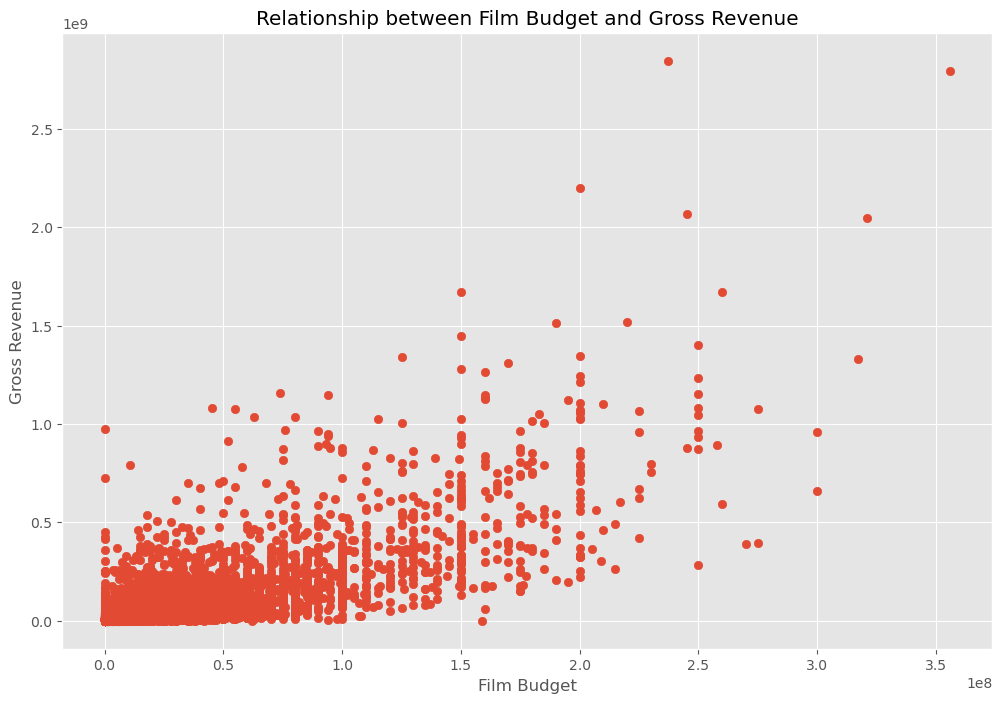

In [19]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Relationship between Film Budget and Gross Revenue')
plt.xlabel('Film Budget')
plt.ylabel('Gross Revenue')

plt.show()

**4.2 Regression plot using Seaborn** <a name="regression-plot-using-seaborn"></a>

<Axes: xlabel='budget', ylabel='gross'>

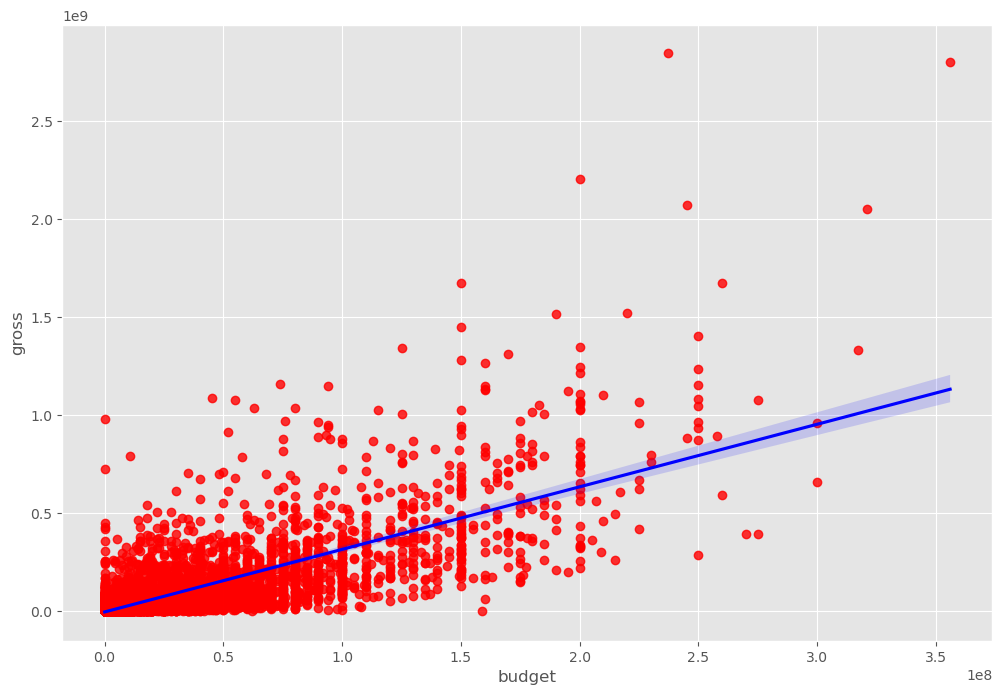

In [20]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

<Axes: xlabel='score', ylabel='gross'>

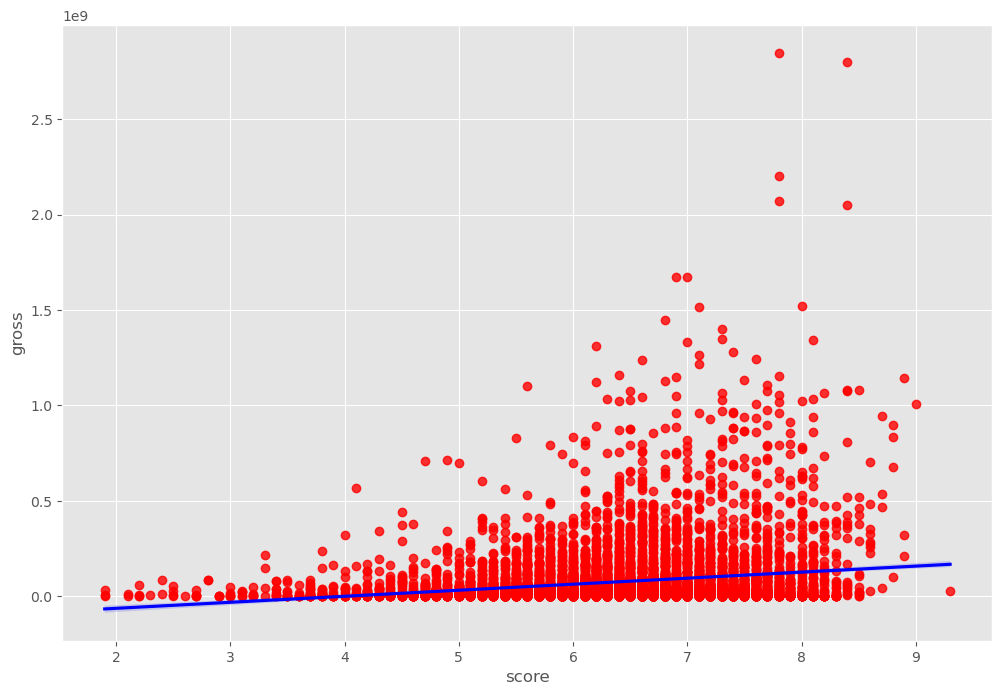

In [21]:
sns.regplot(x="score", y="gross", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

**4.3 Find correlation in numeric values using .corr() method** <a name="find-correlation-in-numeric-values"></a>

In [22]:
# Use the sorted dataframe
gross_sorted = df.sort_values(by=['gross'], inplace=False, ascending=False)

# Select only numeric columns for correlation calculation
numeric_columns = gross_sorted.select_dtypes(include=['number'])

#Check correlation
numeric_columns.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222427,0.309212,0.261900,0.116358
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.398387
votes,0.222427,0.409182,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.055665,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186392,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.398387,0.306984,0.268372,0.244339,1.000000


In [23]:
# Use different correlation methods - pearson, kendall, spearman
# Default is pearson
numeric_columns.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222427,0.309212,0.261900,0.116358
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.398387
votes,0.222427,0.409182,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.055665,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186392,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.398387,0.306984,0.268372,0.244339,1.000000


In [24]:
numeric_columns.corr(method='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.330410,0.209304,0.216595,0.096390
score,0.067652,1.000000,0.300115,-0.005194,0.090626,0.283966
votes,0.330410,0.300115,1.000000,0.439883,0.560449,0.197697
budget,0.209304,-0.005194,0.439883,1.000000,0.541956,0.176184
gross,0.216595,0.090626,0.560449,0.541956,1.000000,0.177429
runtime,0.096390,0.283966,0.197697,0.176184,0.177429,1.000000


In [25]:
numeric_columns.corr(method='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.468107,0.291152,0.314681,0.141805
score,0.099045,1.000000,0.428138,-0.007500,0.132569,0.400394
votes,0.468107,0.428138,1.000000,0.604693,0.752550,0.289359
budget,0.291152,-0.007500,0.604693,1.000000,0.716816,0.246941
gross,0.314681,0.132569,0.752550,0.716816,1.000000,0.257478
runtime,0.141805,0.400394,0.289359,0.246941,0.257478,1.000000


**4.4 Create heatmap using Seaborn** <a name="create-heatmap-using-seaborn"></a>

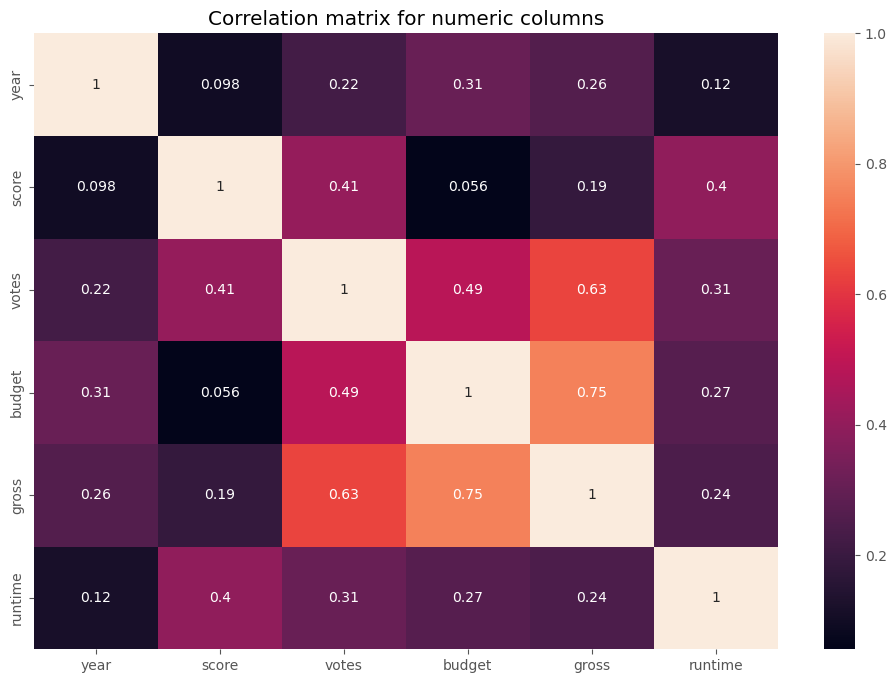

In [26]:
corr_matrix = numeric_columns.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation matrix for numeric columns')
plt.show()

In [27]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrected
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


**4.4.1 Categorical Encoding** <a name="categorical-encoding"></a>

In [28]:
# Convert all object type data to Category

df_encoded = df.copy()

for col in df_encoded.columns:
    if(df_encoded[col].dtype == 'object'):
        df_encoded[col] = df_encoded[col].astype('category')
        df_encoded[col] = df_encoded[col].cat.codes

df_encoded.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrected
0,6587,6,6,1980,1980-06-13,8.4,927000,2589,4014,1047,54,19000000,46998772,2319,146,0
1,5573,6,1,1980,1980-07-02,5.8,65000,2269,1632,327,55,4500000,58853106,731,104,0
2,5142,4,0,1980,1980-06-20,8.7,1200000,1111,2567,1745,55,18000000,538375067,1540,124,0
3,286,4,4,1980,1980-07-02,7.7,221000,1301,2000,2246,55,3500000,83453539,1812,88,0
4,1027,6,4,1980,1980-07-25,7.3,108000,1054,521,410,55,6000000,39846344,1777,98,0


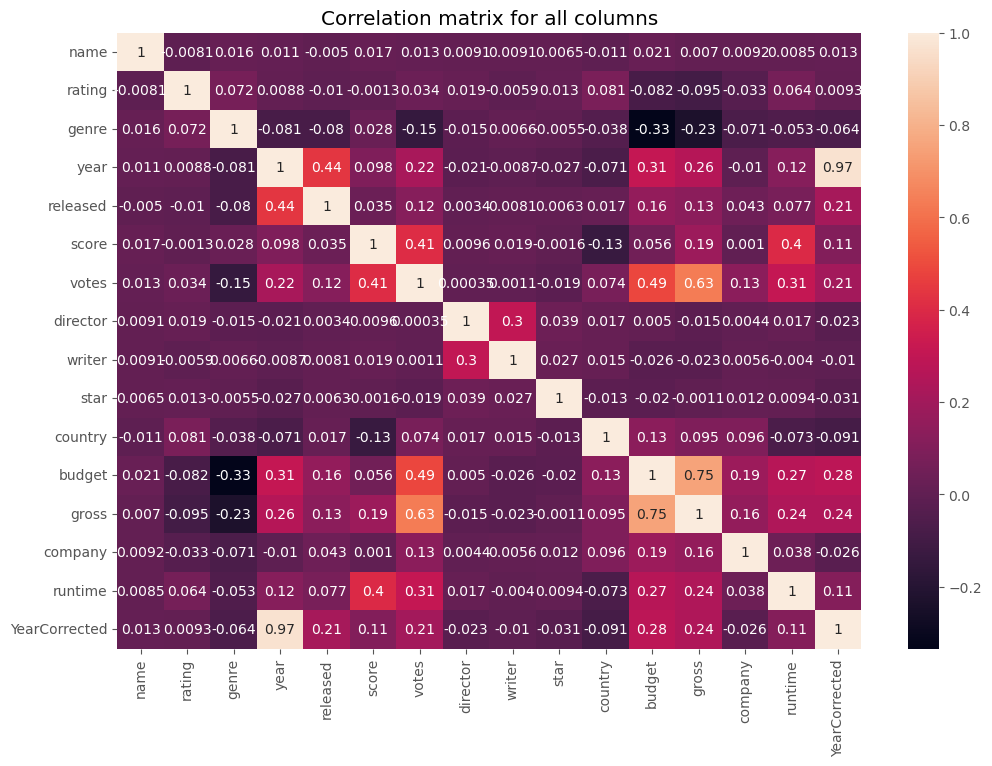

In [29]:
# Create heatmap with all columns

corr_matrix_all = df_encoded.corr(method='pearson')
sns.heatmap(corr_matrix_all, annot=True)
plt.title('Correlation matrix for all columns')
plt.show()

**4.5 Extracting only pairs with high correlation.** <a name="extracting-only-pairs-with-high-correlation"></a>

In [30]:
correlation_matrix = df_encoded.corr()
corr_pairs = correlation_matrix.unstack()

In [31]:
sorted_pairs = corr_pairs.sort_values()

In [32]:
high_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < 1.0)]
high_corr

gross          votes            0.632870
votes          gross            0.632870
budget         gross            0.750157
gross          budget           0.750157
YearCorrected  year             0.967486
year           YearCorrected    0.967486
dtype: float64

**4.6 Create boxplot** <a name="create-boxplot"></a>

**To check for presence of outliers**

<Axes: >

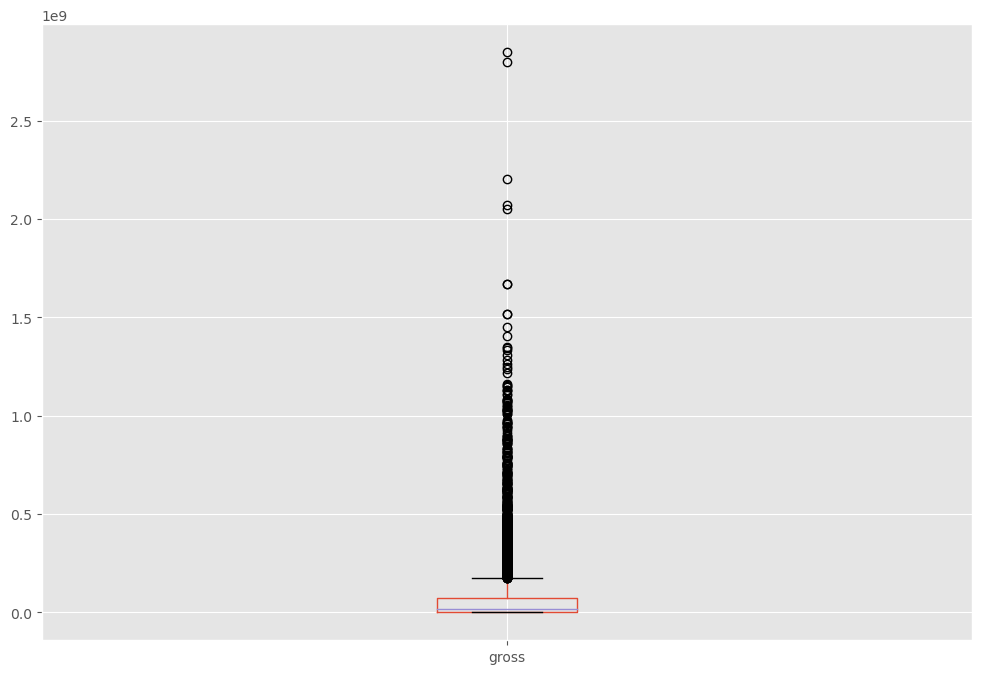

In [33]:
df.boxplot(column=['gross'])

**4.7 Create Swarmplot using Seaborn** <a name="create-swarmplot"></a>

**Displays individual data points along an axis, avoiding overlap by adjusting the positions of the points.**

C:\Users\MRT\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 79.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\MRT\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 73.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\MRT\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 51.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\MRT\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 52.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\MRT\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.5% of the points cannot be

<Axes: xlabel='rating', ylabel='gross'>

C:\Users\MRT\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 51.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\MRT\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 52.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


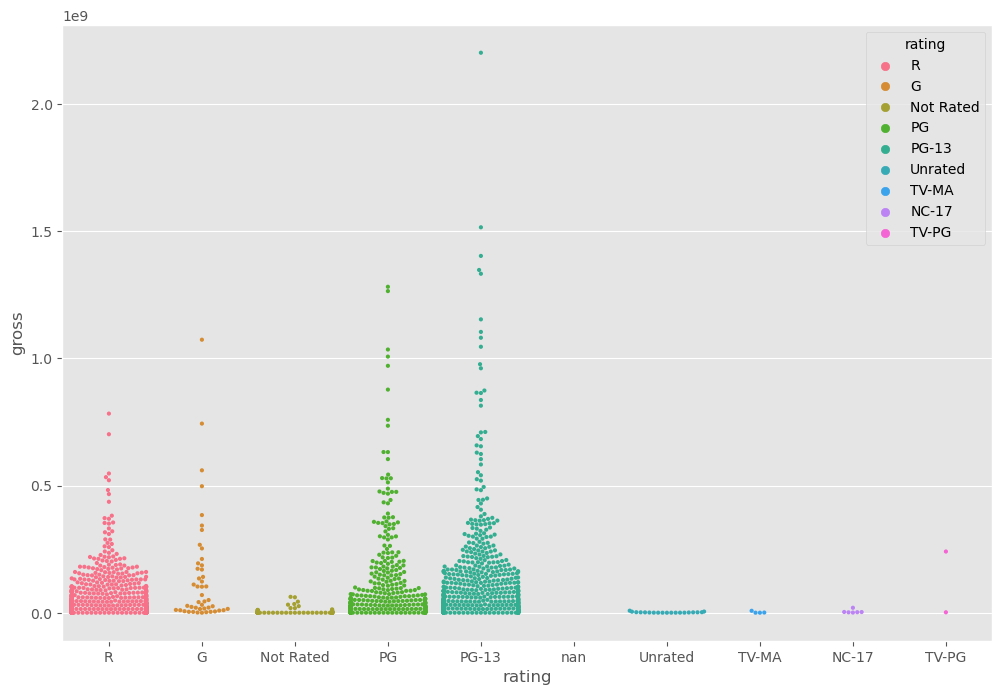

In [38]:
df_sample = df.sample(n=2500) 
sns.swarmplot(x="rating", y="gross", hue="rating", data=df_sample, size=3)

**4.8 Create stripplot using Seaborn**  <a name="create-stripplot"></a>

**Displays individual data points along a single axis. It is similar to a swarm plot, but unlike the swarm plot, strip plots do not attempt to adjust the positions of points to avoid overlap.**

<Axes: xlabel='rating', ylabel='gross'>

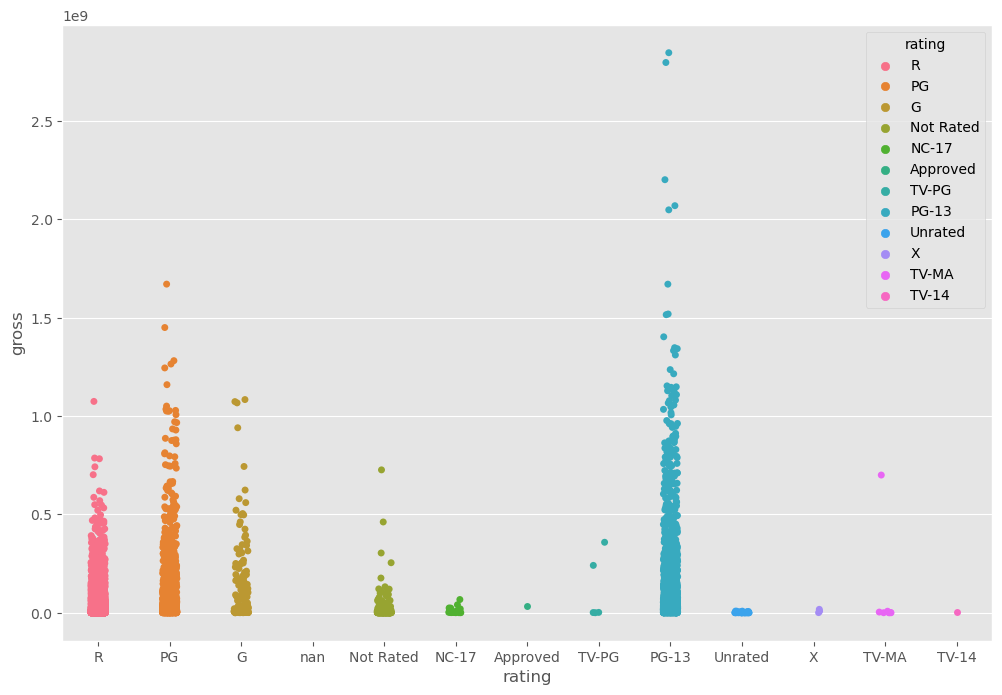

In [35]:
sns.stripplot(x="rating", y="gross", hue="rating", data=df)